# Ejemplo de CNN 2D en la base de datos cifar100

In [291]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.11.0


In [292]:
# descargamos los datos cifar100 y los partimos en train y test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [293]:
# Tamaño de los datos (#datos,#lado,#alto,#canales)
print(X_train.shape)

(50000, 32, 32, 3)


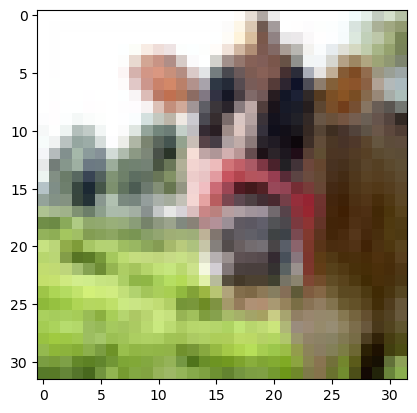

In [294]:
import matplotlib.pyplot as plt

# enseñamos la primera imagen del dataset
plt.imshow(X_train[0],cmap="gray")

In [295]:
X_train = X_train[0:10000,:,:,:]/255
X_test = X_test[0:10000,:,:,:]/255
y_train = y_train[0:10000]
y_test = y_test[0:10000]

In [296]:
# one-hot encoding en las 'y'
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Modelo

In [297]:
# Hacemos un modelo con varias capas

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras import regularizers

#crear modelo
model = Sequential()

#Vamos añadiendo capas
model.add(Conv2D(64, kernel_size=7, activation='relu', input_shape=(32,32,3),
                activity_regularizer=regularizers.l1(0.)))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, kernel_size=5, activation='relu',
                activity_regularizer=regularizers.l1(0.)))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(MaxPooling2D(2))
model.add(Conv2D(256, kernel_size=3, activation='relu',
                activity_regularizer=regularizers.l1(0.), padding='same'))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Conv2D(64, kernel_size=3, activation='relu',
                activity_regularizer=regularizers.l1(0.), padding='same'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

In [298]:
# Compilamos el modelo

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [299]:
# Este es el modelo
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_106 (Conv2D)         (None, 26, 26, 64)        9472      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_107 (Conv2D)         (None, 9, 9, 128)         204928    
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_108 (Conv2D)         (None, 4, 4, 256)         295168    
                                                                 
 conv2d_109 (Conv2D)         (None, 4, 4, 64)        

In [300]:
# Vamos a usar el callback de earlystopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.01)

In [301]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.3, epochs=50, callbacks=[early_stopping])

Epoch 1/50
219/219 [==============================] - 32s 142ms/step - loss: 4.4785 - accuracy: 0.0189 - val_loss: 4.3460 - val_accuracy: 0.0257
Epoch 2/50
219/219 [==============================] - 27s 124ms/step - loss: 4.2708 - accuracy: 0.0420 - val_loss: 4.2561 - val_accuracy: 0.0407
Epoch 3/50
219/219 [==============================] - 25s 113ms/step - loss: 4.1078 - accuracy: 0.0610 - val_loss: 4.0759 - val_accuracy: 0.0710
Epoch 4/50
219/219 [==============================] - 26s 119ms/step - loss: 3.9686 - accuracy: 0.0821 - val_loss: 4.0086 - val_accuracy: 0.0840
Epoch 5/50
219/219 [==============================] - 28s 129ms/step - loss: 3.8318 - accuracy: 0.1027 - val_loss: 3.9058 - val_accuracy: 0.1060
Epoch 6/50
219/219 [==============================] - 27s 125ms/step - loss: 3.6813 - accuracy: 0.1274 - val_loss: 3.8216 - val_accuracy: 0.1150
Epoch 7/50
219/219 [==============================] - 26s 119ms/step - loss: 3.5307 - accuracy: 0.1517 - val_loss: 3.7944 - val_ac

In [302]:
# Evaluamos el modelo
score = model.evaluate(X_test,y_test)
score

313/313 [==============================] - 8s 24ms/step - loss: 5.1220 - accuracy: 0.1521


[5.121956825256348, 0.15209999680519104]

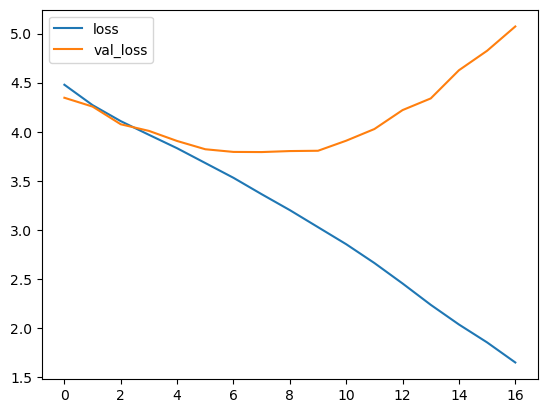

In [303]:
# Ploteamos la evolucion del loss durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()


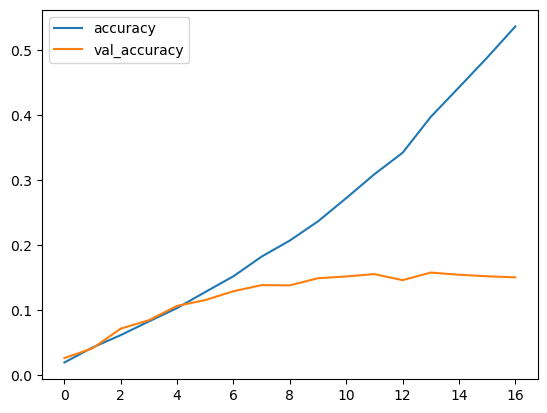

In [304]:
# Ploteamos la evolucion del accuracy durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.legend()


In [305]:
# Predecimos sobre test
preds_test = model.predict(X_test)
preds_test.shape

313/313 [==============================] - 9s 29ms/step


(10000, 100)

15


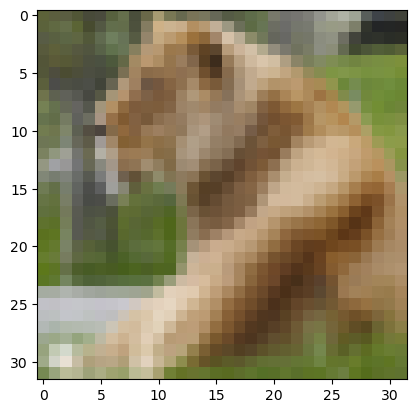

In [306]:
import numpy as np
# Elegimos una imagen de test
idx_mostrar = 2990
# Mostramos la imagen
plt.imshow(X_test[idx_mostrar,:,:,:])
# Mostramos las probabilidades que da el modelo a cada clase
print(np.argmax(preds_test[idx_mostrar]))